<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%203/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Data Analysis with Python

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Explore features or charecteristics to predict price of BTC


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="https://#import_data">Import Data from Module</a></li>
    <li><a href="https://#pattern_visualization">Analyzing Individual Feature Patterns using Visualization</a></li>
    <li><a href="https://#discriptive_statistics">Descriptive Statistical Analysis</a></li>
    <li><a href="https://#basic_grouping">Basics of Grouping</a></li>
    <li><a href="https://#correlation_causation">Correlation and Causation</a></li>
    <li><a href="https://#anova">ANOVA</a></li>
    <li><a href="https://#durbin">Durbin-Watson Test</a></li>
    <li><a href="https://#granger">Granger Causality Test</a></li>
</ol>

</div>

<hr>


<h3>What are the main characteristics that have the most impact on the BTC price?</h3>


<h2 id="import_data">1. Import Data from Module 2</h2>


<h4>Setup</h4>


you are running the lab in your  browser, so we will install the libraries using `piplite`


In [1]:
#you are running the lab in your  browser, so we will install the libraries using ``piplite``
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['seaborn'])
await piplite.install(['plotly'])
await piplite.install(['altair'])
await piplite.install(['mpl_finance'])

Import libraries:


If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:


In [2]:
#If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
#! mamba install scipy=1.7.1-y
#!  mamba install seaborn=0.9.0-y

In [3]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

This function will download the dataset into your browser


In [4]:
#This function will download the dataset into your browser 

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())


Load the data and store it in dataframe `df`:


This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/DA101EN_object_storage?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">HERE</a> for free storage.


In [5]:
#set path host where will be all our datasets 
path_host='https://1824251045.rsc.cdn77.org/web/algohouse/data'

you will need to download the dataset; if you are running locally, please comment out the following


In [6]:
files = ["APEBUSD_trades_1m.csv","BTCBUSD_trades_1m.csv","ETHBUSD_trades_1m.csv","BNBBUSD_trades_1m.csv","XRPBUSD_trades_1m.csv",
         "DOGEBUSD_trades_1m.csv","ADABUSD_trades_1m.csv","MATICBUSD_trades_1m.csv"]
for file in files:
         await download(f'{path_host}/{file}', file)

Set headers for our main crypto:
    

In [7]:
headers = ["time","BTCBUSD_open","BTCBUSD_high","BTCBUSD_low","BTCBUSD_close","BTCBUSD_volume","BTCBUSD_rec_count","BTCBUSD_avg_price"]

In [8]:
# read our csv
df_btc = pd.read_csv("BTCBUSD_trades_1m.csv", index_col=0, low_memory=False)
df_btc.columns = headers
df_btc.head()

,time,BTCBUSD_open,BTCBUSD_high,BTCBUSD_low,BTCBUSD_close,BTCBUSD_volume,BTCBUSD_rec_count,BTCBUSD_avg_price
0,2022-11-11 14:38:00,16540.1,16540.1,16486.5,16486.5,304.951,97,16516.807793
1,2022-11-11 14:39:00,16489.3,16493.3,16456.2,16462.1,319.262,103,16473.844114
2,2022-11-11 14:40:00,16465.5,16496.0,16447.4,16492.9,290.905,99,16478.644495
3,2022-11-11 14:41:00,16492.9,16547.1,16472.5,16543.0,314.045,99,16516.504443
4,2022-11-11 14:42:00,16540.2,16547.1,16498.2,16498.3,226.951,99,16527.093981


Now we will combine datasets with main:

In [9]:
# combine datasets
df = df_btc
for file in files:
    if file != "BTCBUSD_trades_1m.csv":
        temp =  pd.read_csv(file, index_col=0, low_memory=False)
        curr = file.split("_")[0]
        temp = temp.add_prefix(f"{curr}_")
        df = df.merge(temp, left_on='time',right_on=f'{curr}_ts')
        df.drop(columns=f'{curr}_ts', inplace=True)
        
for column in df.columns:
    #save only columns with information about BTCBUSD and with information about avg price
    if not "BTCBUSD" in column and not "price" in column and not "time" in column:
        df = df.drop(column, axis = 1)
        
df.head()

,time,BTCBUSD_open,BTCBUSD_high,BTCBUSD_low,BTCBUSD_close,BTCBUSD_volume,BTCBUSD_rec_count,BTCBUSD_avg_price,APEBUSD_avg_price,ETHBUSD_avg_price,BNBBUSD_avg_price,XRPBUSD_avg_price,DOGEBUSD_avg_price,ADABUSD_avg_price,MATICBUSD_avg_price
0,2022-11-11 14:38:00,16540.1,16540.1,16486.5,16486.5,304.951,97,16516.807793,3.084732,1213.655402,283.244612,0.369150,0.080926,0.344496,0.993500
1,2022-11-11 14:39:00,16489.3,16493.3,16456.2,16462.1,319.262,103,16473.844114,3.069644,1210.132181,282.077591,0.367978,0.080565,0.343841,0.990534
2,2022-11-11 14:40:00,16465.5,16496.0,16447.4,16492.9,290.905,99,16478.644495,3.071029,1210.617423,281.679925,0.367303,0.080577,0.343694,0.989423
3,2022-11-11 14:41:00,16492.9,16547.1,16472.5,16543.0,314.045,99,16516.504443,3.084393,1215.029038,281.223183,0.367660,0.080715,0.343953,0.991930
4,2022-11-11 14:42:00,16540.2,16547.1,16498.2,16498.3,226.951,99,16527.093981,3.088095,1216.557003,281.912312,0.368224,0.081038,0.344382,0.993091


<h2 id="pattern_visualization">2. Analyzing Individual Feature Patterns Using Visualization</h2>


To install Seaborn we use pip, the Python package manager.


Import visualization packages "Matplotlib" and "Seaborn". Don't forget about "%matplotlib inline" to plot in a Jupyter notebook.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>


In [11]:
#set correct types
df[["time"]] = df[["time"]].astype("datetime64")

In [12]:
# list the data types for each column
print(df.dtypes)

time                   datetime64[ns]
BTCBUSD_open                  float64
BTCBUSD_high                  float64
BTCBUSD_low                   float64
BTCBUSD_close                 float64
BTCBUSD_volume                float64
BTCBUSD_rec_count               int64
BTCBUSD_avg_price             float64
APEBUSD_avg_price             float64
ETHBUSD_avg_price             float64
BNBBUSD_avg_price             float64
XRPBUSD_avg_price             float64
DOGEBUSD_avg_price            float64
ADABUSD_avg_price             float64
MATICBUSD_avg_price           float64
dtype: object


Use <code>packages mpl_finance and
 matplotlib</code> for our Candlestick Charts:

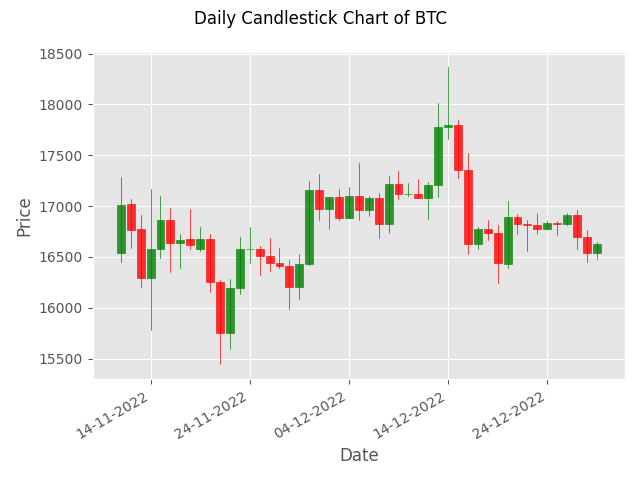

<Figure size 640x480 with 0 Axes>

In [91]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates

main_df = pd.read_csv("BTCBUSD_trades_1m.csv", index_col=0, low_memory=False)
main_df["ts"] = pd.to_datetime(main_df["ts"])

plt.style.use('ggplot')

# Extracting Data for plotting
ohlc = main_df.loc[:, ['ts', 'open', 'high', 'low', 'close', 'volume']]

ohlc['ts'] = pd.to_datetime(ohlc['ts'])
ohlc.index = ohlc['ts']

ohlc = ohlc.resample("1d").agg({
    "open": "first",
    "high": "max",
    "low": "min",
    "close": "last",
    "volume": "sum"
})

ohlc['ts'] = ohlc.index
ohlc['ts'] = ohlc['ts'].apply(mpl_dates.date2num)


# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, zip(ohlc["ts"], ohlc["open"], ohlc["high"], ohlc["low"], ohlc["close"], ohlc["volume"]), width=0.8, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of BTC')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3>Question  #1:</h3>

<b>What is the data type of the column "BTCBUSD_open"? </b>

</div>


In [14]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
df['BTCBUSD_open'].dtypes
```

</details>


For example, we can calculate the correlation between variables  of type "int64" or "float64" using the method "corr":


In [15]:
corr = df.corr()
corr

,BTCBUSD_open,BTCBUSD_high,BTCBUSD_low,BTCBUSD_close,BTCBUSD_volume,BTCBUSD_rec_count,BTCBUSD_avg_price,APEBUSD_avg_price,ETHBUSD_avg_price,BNBBUSD_avg_price,XRPBUSD_avg_price,DOGEBUSD_avg_price,ADABUSD_avg_price,MATICBUSD_avg_price
BTCBUSD_open,1.000000,0.999753,0.999779,0.999675,-0.029440,-0.158690,0.999832,0.580734,0.880637,0.064367,0.295724,0.364792,0.057898,0.490789
BTCBUSD_high,0.999753,1.000000,0.999533,0.999798,-0.016125,-0.148802,0.999877,0.577558,0.881670,0.065226,0.295432,0.364788,0.061605,0.494498
BTCBUSD_low,0.999779,0.999533,1.000000,0.999801,-0.040935,-0.167978,0.999869,0.583646,0.879875,0.063828,0.296255,0.364970,0.054651,0.487606
BTCBUSD_close,0.999675,0.999798,0.999801,1.000000,-0.028612,-0.158669,0.999927,0.580788,0.880755,0.064428,0.295847,0.364880,0.057946,0.490914
BTCBUSD_volume,-0.029440,-0.016125,-0.040935,-0.028612,1.000000,0.505227,-0.028263,-0.068664,-0.008527,0.021322,-0.009886,0.003084,0.087996,0.063588
BTCBUSD_rec_count,-0.158690,-0.148802,-0.167978,-0.158669,0.505227,1.000000,-0.158305,-0.340785,-0.048611,0.144252,0.009183,0.008874,0.369915,0.251711
BTCBUSD_avg_price,0.999832,0.999877,0.999869,0.999927,-0.028263,-0.158305,1.000000,0.580604,0.880881,0.064559,0.295896,0.364919,0.058205,0.491169
APEBUSD_avg_price,0.580734,0.577558,0.583646,0.580788,-0.068664,-0.340785,0.580604,1.000000,0.525638,0.250646,0.413247,0.550292,-0.137763,0.122063
ETHBUSD_avg_price,0.880637,0.881670,0.879875,0.880755,-0.008527,-0.048611,0.880881,0.525638,1.000000,0.368134,0.468060,0.617403,0.346060,0.732224
BNBBUSD_avg_price,0.064367,0.065226,0.063828,0.064428,0.021322,0.144252,0.064559,0.250646,0.368134,1.000000,0.835815,0.817452,0.769498,0.618868


The diagonal elements are always one; we will study correlation more precisely Pearson correlation in-depth at the end of the notebook.


Now we have correlation, so we can built a <b>heatmap</b>:

<AxesSubplot:>

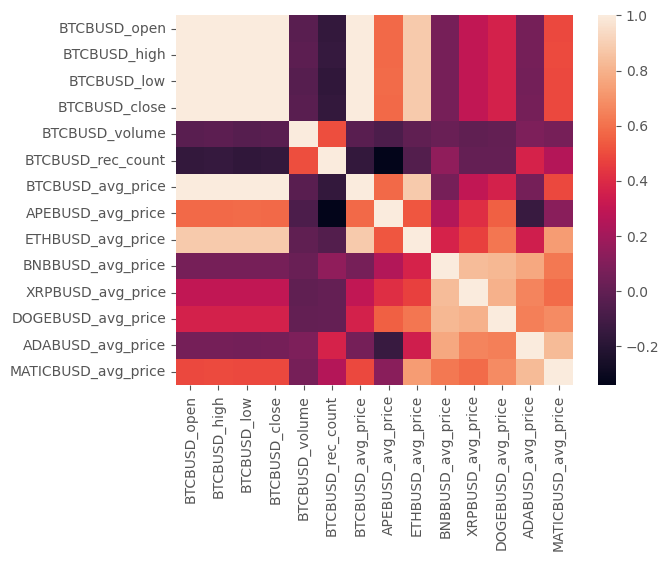

In [16]:
sns.heatmap(corr)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3> Question  #2: </h3>

<p>Find the correlation between the following columns: avg_prices for all crypto; and built a heatmap for them.</p>
<p>Hint: if you would like to select those columns, use the following syntax: df[["APEBUSD_avg_price","BTCBUSD_avg_price","ETHBUSD_avg_price","BNBBUSD_avg_price","XRPBUSD_avg_price",
         "DOGEBUSD_avg_price","ADABUSD_avg_price","MATICBUSD_avg_price"]]</p>
</div>


In [17]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
corr = df[["APEBUSD_avg_price","BTCBUSD_avg_price","ETHBUSD_avg_price","BNBBUSD_avg_price","XRPBUSD_avg_price",
         "DOGEBUSD_avg_price","ADABUSD_avg_price","MATICBUSD_avg_price"]].corr()
sns.heatmap(corr)
```

</details>


<h2>Continuous Numerical Variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between a volume for BTC and a volume for DOGE, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data.</p>


Let's see several examples of different linear relationships:


<h3>Positive Linear Relationship</h4>


Let's find the scatterplot of "BTCBUSD_avg_price" and "ETHBUSD_avg_price".


(0.0, 1413.1779271514124)

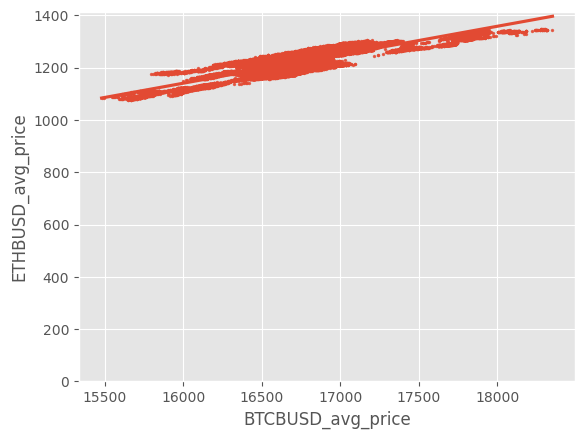

In [18]:
# volume price as potential predictor variable of volume
sns.regplot(x="BTCBUSD_avg_price", y="ETHBUSD_avg_price", data=df,scatter_kws={'s':2})
plt.ylim(0,)

<p>As the BTCBUSD_avg_price goes up, the ETHBUSD_avg_price goes up: this indicates a positive direct correlation between these two variables. BTCBUSD_avg_price seems like a good predictor of ETHBUSD_avg_price since the regression line is almost a perfect diagonal line.</p>


We can examine the correlation between 'BTCBUSD_avg_price' and 'ETHBUSD_avg_price' and see that it's approximately 0.880881.


In [19]:
df[["BTCBUSD_avg_price", "ETHBUSD_avg_price"]].corr()

,BTCBUSD_avg_price,ETHBUSD_avg_price
BTCBUSD_avg_price,1.000000,0.880881
ETHBUSD_avg_price,0.880881,1.000000


BTCBUSD_avg_price is a potential predictor variable of APEBUSD_avg_price. Let's find the scatterplot of "BTCBUSD_avg_price" and "APEBUSD_avg_price".


<AxesSubplot:xlabel='BTCBUSD_avg_price', ylabel='APEBUSD_avg_price'>

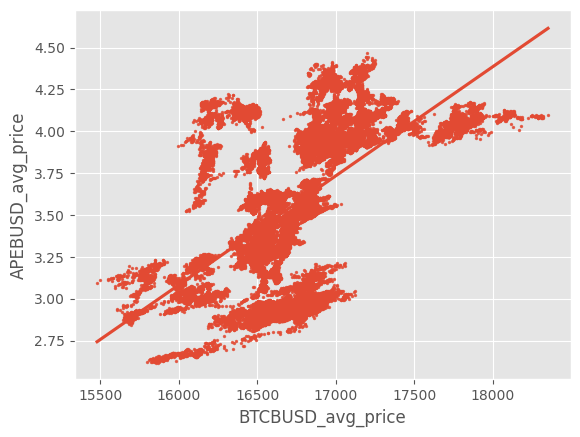

In [20]:
sns.regplot(x="BTCBUSD_avg_price", y="APEBUSD_avg_price", data=df,scatter_kws={'s':2})

<p>As BTCBUSD_avg_price goes up, the APEBUSD_avg_price goes up: this indicates a positive relationship between these two variables. BTCBUSD_avg_price could potentially be a predictor of APEBUSD_avg_price.</p>


We can examine the correlation between 'BTCBUSD_avg_price' and 'APEBUSD_avg_price' and see it's approximately 0.580604.


In [21]:
df[['BTCBUSD_avg_price', 'APEBUSD_avg_price']].corr()

,BTCBUSD_avg_price,APEBUSD_avg_price
BTCBUSD_avg_price,1.000000,0.580604
APEBUSD_avg_price,0.580604,1.000000


<h3>Weak Linear Relationship</h3>


Let's see if "BTCBUSD_avg_price" is a predictor variable of "ADABUSD_avg_price".


<AxesSubplot:xlabel='BTCBUSD_avg_price', ylabel='ADABUSD_avg_price'>

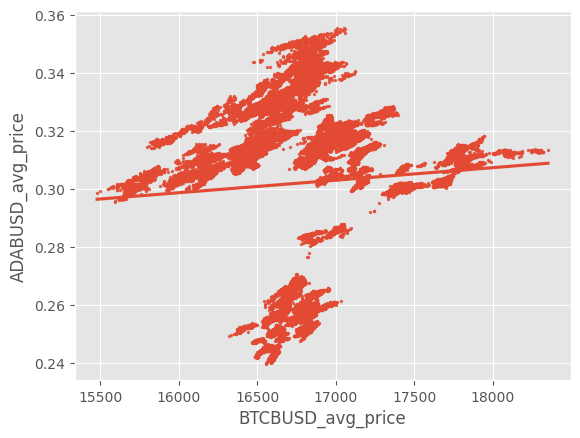

In [22]:
sns.regplot(x="BTCBUSD_avg_price", y="ADABUSD_avg_price", data=df,scatter_kws={'s':2})

<p>BTCBUSD_avg_price does not seem like a good predictor of the ADABUSD_avg_price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>


We can examine the correlation between 'opne_btc' and 'volume_btc' and see it's approximately 0.058205.


In [23]:
df[['BTCBUSD_avg_price','ADABUSD_avg_price']].corr()

,BTCBUSD_avg_price,ADABUSD_avg_price
BTCBUSD_avg_price,1.000000,0.058205
ADABUSD_avg_price,0.058205,1.000000


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  3 a): </h1>

<p>Find the correlation  between x="BTCBUSD_avg_price" and y="MATICBUSD_avg_price".</p>
<p>Hint: if you would like to select those columns, use the following syntax: df[["BTCBUSD_avg_price","MATICBUSD_avg_price"]].  </p>
</div>


In [24]:
# Write your code below and press Shift+Enter to execute


<details><summary>Click here for the solution</summary>

```python

#The correlation is 0.491169.

df[["BTCBUSD_avg_price","MATICBUSD_avg_price"]].corr()

```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  3 b):</h1>

<p>Given the correlation results between "
BTCBUSD_avg_price" and "MATICBUSD_avg_price", do you expect a linear relationship?</p> 
<p>Verify your results using the function "regplot()".</p>
</div>


In [25]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python

#There is a positive correlation between the variable 'BTCBUSD_avg_price' and 'MATICBUSD_avg_price.'. We can see this using "regplot" to demonstrate this.

#Code: 
sns.regplot(x="BTCBUSD_avg_price", y="MATICBUSD_avg_price", data=df,scatter_kws={'s':2})

```

</details>


<h3>Make Categorical Variables for next point</h3>
<p>Let`s make categorical values as in the past lab.</p>

<p>We would like 5 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of open, we want to set start_value = min(df["open"]).</p>
<p>Since we want to include the maximum value of open, we want to set end_value = max(df["open"]).</p>
<p>Since we are building 5 bins of equal length, there should be 6 dividers, so numbers_generated = 6.</p>


We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.


In [26]:
bins = np.linspace(min(df["BTCBUSD_avg_price"]), max(df["BTCBUSD_avg_price"]), 6)
bins

array([15479.29012641, 16053.86336151, 16628.43659662, 17203.00983172,
       17777.58306683, 18352.15630194])

We set group  names:


In [27]:
group_names = ['Low','Lower Medium' ,'Medium', 'Upper Medium' ,'High']

We apply the function "cut" to determine what each value of `df['BTCBUSD_avg_price']` belongs to.


In [28]:
df['BTCBUSD_avg_price-binned'] = pd.cut(df['BTCBUSD_avg_price'], bins, labels=group_names, include_lowest=True )
df[['BTCBUSD_avg_price','BTCBUSD_avg_price-binned']].head()

,BTCBUSD_avg_price,BTCBUSD_avg_price-binned
0,16516.807793,Lower Medium
1,16473.844114,Lower Medium
2,16478.644495,Lower Medium
3,16516.504443,Lower Medium
4,16527.093981,Lower Medium


Same for avg_price_dog:

In [29]:
bins = np.linspace(min(df["DOGEBUSD_avg_price"]), max(df["DOGEBUSD_avg_price"]), 6)
bins

array([0.06942347, 0.07777601, 0.08612854, 0.09448108, 0.10283361,
       0.11118615])

In [30]:
df['DOGEBUSD_avg_price-binned'] = pd.cut(df['DOGEBUSD_avg_price'], bins, labels=group_names, include_lowest=True )
df[['DOGEBUSD_avg_price','DOGEBUSD_avg_price-binned']].head()

,DOGEBUSD_avg_price,DOGEBUSD_avg_price-binned
0,0.080926,Lower Medium
1,0.080565,Lower Medium
2,0.080577,Lower Medium
3,0.080715,Lower Medium
4,0.081038,Lower Medium


Same for rec_count_btc:
    

In [31]:
bins = np.linspace(min(df["BTCBUSD_rec_count"]), max(df["BTCBUSD_rec_count"]), 6)
bins

array([  1. ,  25.6,  50.2,  74.8,  99.4, 124. ])

In [32]:
df['BTCBUSD_rec_count-binned'] = pd.cut(df['BTCBUSD_rec_count'], bins, labels=group_names, include_lowest=True )
df[['BTCBUSD_rec_count','BTCBUSD_rec_count-binned']].head()

,BTCBUSD_rec_count,BTCBUSD_rec_count-binned
0,97,Upper Medium
1,103,High
2,99,Upper Medium
3,99,Upper Medium
4,99,Upper Medium


<h3>Categorical Variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>


Let's look at the relationship between "BTCBUSD_avg_price" and "BTCBUSD_avg_price-binned".


<AxesSubplot:xlabel='BTCBUSD_avg_price-binned', ylabel='BTCBUSD_avg_price'>

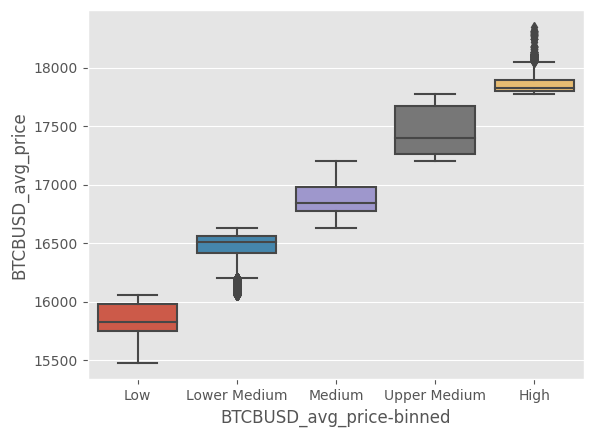

In [33]:
sns.boxplot(x="BTCBUSD_avg_price-binned", y="BTCBUSD_avg_price", data=df)

<p>Here we see that the distribution of price between these five categories are distinct enough to take in which catagery price will be as a potential good predictor of price. Let's examine engine "DOGEBUSD_avg_price" and "DOGEBUSD_avg_price-bined":</p>


<AxesSubplot:xlabel='DOGEBUSD_avg_price-binned', ylabel='DOGEBUSD_avg_price'>

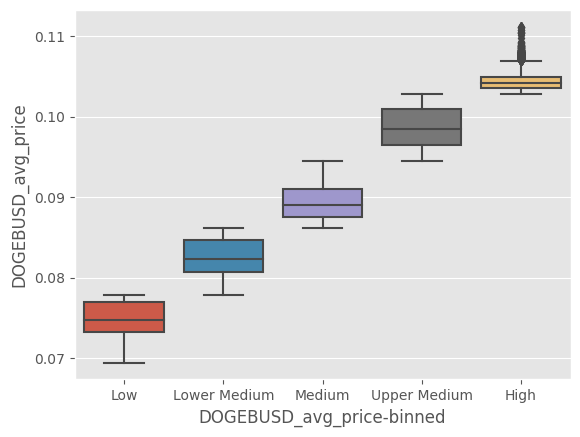

In [34]:
sns.boxplot(x="DOGEBUSD_avg_price-binned", y="DOGEBUSD_avg_price", data=df)

<p>We can see the same.</p>


Let's examine "BTCBUSD_avg_price-binned" and "DOGEBUSD_avg_price".


<AxesSubplot:xlabel='BTCBUSD_avg_price-binned', ylabel='DOGEBUSD_avg_price'>

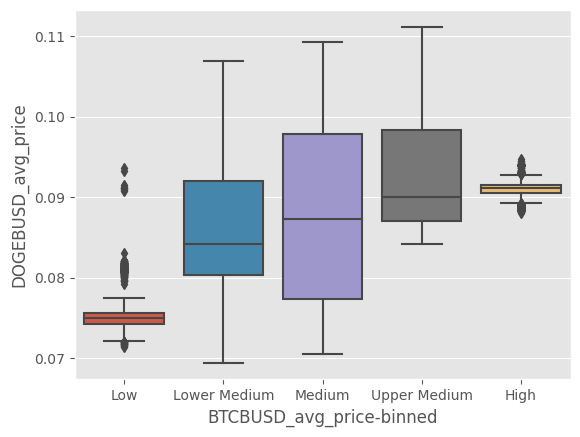

In [35]:
# drive-wheels
sns.boxplot(x="BTCBUSD_avg_price-binned", y="DOGEBUSD_avg_price", data=df)

<p><p>We see that the distributions of price between the different categories have a significant overlap, so BTCBUSD_avg_price-binned would not be a good predictor of DOGEBUSD_avg_price. </p>
</p>


<h2 id="discriptive_statistics">3. Descriptive Statistical Analysis</h2>


<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:

<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


We can apply the method "describe" as follows:


In [36]:
df.describe()

,BTCBUSD_open,BTCBUSD_high,BTCBUSD_low,BTCBUSD_close,BTCBUSD_volume,BTCBUSD_rec_count,BTCBUSD_avg_price,APEBUSD_avg_price,ETHBUSD_avg_price,BNBBUSD_avg_price,XRPBUSD_avg_price,DOGEBUSD_avg_price,ADABUSD_avg_price,MATICBUSD_avg_price
count,63947.000000,63947.000000,63947.000000,63947.000000,63947.000000,63947.000000,63947.000000,63947.000000,63947.000000,63947.000000,63947.000000,63947.000000,63947.000000,63947.000000
mean,16788.200880,16791.861678,16784.666838,16788.203977,49.027100,43.261326,16788.302583,3.596184,1226.161220,273.854682,0.374341,0.087267,0.302205,0.865409
std,374.934777,374.232493,375.638736,374.940984,109.758847,21.631247,374.898835,0.420561,46.316067,21.115321,0.019416,0.010235,0.027798,0.055044
min,15478.500000,15511.600000,15443.500000,15475.100000,0.009000,1.000000,15479.290126,2.618512,1075.992278,219.633131,0.321119,0.069423,0.239938,0.759138
25%,16566.200000,16570.400000,16562.500000,16566.100000,10.196500,26.000000,16566.289031,3.258325,1197.122161,250.595362,0.354679,0.077727,0.283572,0.810177
50%,16799.100000,16802.000000,16796.100000,16799.200000,23.795000,39.000000,16799.195444,3.597608,1218.610201,276.310000,0.379248,0.086382,0.312099,0.870488
75%,16965.600000,16968.300000,16963.550000,16965.600000,50.147000,59.000000,16965.715440,3.965548,1264.884185,290.587961,0.389375,0.096529,0.318920,0.910885
max,18344.600000,18370.000000,18324.200000,18344.700000,3986.887000,124.000000,18352.156302,4.467341,1347.805427,317.315913,0.417387,0.111186,0.355647,1.064086


The default setting of "describe" skips variables of type category. We can apply the method "describe" on the variables of type 'category' as follows:


In [37]:
df.describe(include='category')

,BTCBUSD_avg_price-binned,DOGEBUSD_avg_price-binned,BTCBUSD_rec_count-binned
count,63947,63947,63947
unique,5,5,5
top,Medium,Low,Lower Medium
freq,38096,16203,26603


<h3>Value Counts</h3>


<p>Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "BTCBUSD_avg_price-binned". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket <code>df['BTCBUSD_avg_price-binned']</code>, not two brackets <code>df[['BTCBUSD_avg_price-binned']]</code>.</p>


In [38]:
df['BTCBUSD_avg_price-binned'].value_counts()

Medium          38096
Lower Medium    18298
Upper Medium     4234
Low              1853
High             1466
Name: BTCBUSD_avg_price-binned, dtype: int64

We can convert the series to a dataframe as follows:


In [39]:
df['BTCBUSD_avg_price-binned'].value_counts().to_frame()

,BTCBUSD_avg_price-binned
Medium,38096
Lower Medium,18298
Upper Medium,4234
Low,1853
High,1466


Let's repeat the above steps but save the results to the dataframe "BTCBUSD_avg_price_binned_counts" and rename the column  'BTCBUSD_avg_price-binned' to 'value_counts'.


In [40]:
BTCBUSD_avg_price_binned_counts = df['BTCBUSD_avg_price-binned'].value_counts().to_frame()
BTCBUSD_avg_price_binned_counts.rename(columns={'BTCBUSD_avg_price-binned': 'value_counts'}, inplace=True)
BTCBUSD_avg_price_binned_counts

,value_counts
Medium,38096
Lower Medium,18298
Upper Medium,4234
Low,1853
High,1466


Now let's rename the index to 'BTCBUSD_avg_price-binned':


In [41]:
BTCBUSD_avg_price_binned_counts.index.name = 'BTCBUSD_avg_price-binned'
BTCBUSD_avg_price_binned_counts

,value_counts
BTCBUSD_avg_price-binned,
Medium,38096
Lower Medium,18298
Upper Medium,4234
Low,1853
High,1466


<p>After examining the value counts of the BTCBUSD_avg_price-binned, we see that this category would be a good predictor variable for the price. This is because we only have mostly our prices in 'Medium'.</p>


<h2 id="basic_grouping">4. Basics of Grouping</h2>


<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>

<p>For example, let's group by the variable "BTCBUSD_avg_price-binned". We see that there are 5 different categories of BTCBUSD_avg_price-binned.</p>


In [42]:
df['BTCBUSD_avg_price-binned'].unique()

['Lower Medium', 'Medium', 'Low', 'Upper Medium', 'High']
Categories (5, object): ['Low' < 'Lower Medium' < 'Medium' < 'Upper Medium' < 'High']

<p>If we want to know, on average, which type of BTCBUSD_avg_price-binned is most valuable, we can group "BTCBUSD_avg_price-binned" and then average them.</p>

<p>We can select the columns 'BTCBUSD_avg_price-binned' and 'BTCBUSD_avg_price', then assign it to the variable "df_group_one".</p>


In [43]:
df_group_one = df[['BTCBUSD_avg_price-binned','BTCBUSD_avg_price']]

We can then calculate the average price for each of the different categories of data.


In [44]:
# grouping results
df_group_one = df_group_one.groupby(['BTCBUSD_avg_price-binned'],as_index=False).mean()
df_group_one

,BTCBUSD_avg_price-binned,BTCBUSD_avg_price
0,Low,15850.632739
1,Lower Medium,16457.834459
2,Medium,16877.634276
3,Upper Medium,17445.379243
4,High,17879.138317


<p>From our data, it seems High category are the most expensive.</p>

<p>You can also group by multiple variables. For example, let's group by both 'BTCBUSD_avg_price-binned' and 'DOGEBUSD_avg_price-binned'. This groups the dataframe by the unique combination of 'BTCBUSD_avg_price-binned' and 'DOGEBUSD_avg_price-binned'. We can store the results in the variable 'grouped_test1'.</p>


In [45]:
# grouping results
df_gptest = df[['BTCBUSD_avg_price-binned','DOGEBUSD_avg_price-binned','BTCBUSD_avg_price']]
grouped_test1 = df_gptest.groupby(['BTCBUSD_avg_price-binned','DOGEBUSD_avg_price-binned'],as_index=False).mean()
grouped_test1

,BTCBUSD_avg_price-binned,DOGEBUSD_avg_price-binned,BTCBUSD_avg_price
0,Low,Low,15837.154965
1,Low,Lower Medium,15942.570343
2,Low,Medium,16035.258486
3,Low,Upper Medium,NaN
4,Low,High,NaN
5,Lower Medium,Low,16452.979404
6,Lower Medium,Lower Medium,16481.487761
7,Lower Medium,Medium,16478.923525
8,Lower Medium,Upper Medium,16338.565184
9,Lower Medium,High,16514.621167


<p>This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.</p>

<p>In this case, we will leave the BTCBUSD_avg_price-binned variable as the rows of the table, and DOGEBUSD_avg_price-binned to become the columns of the table:</p>


In [46]:
grouped_pivot = grouped_test1.pivot(index='DOGEBUSD_avg_price-binned',columns='BTCBUSD_avg_price-binned')
grouped_pivot

BTCBUSD_avg_price                              \
BTCBUSD_avg_price-binned                Low  Lower Medium        Medium   
DOGEBUSD_avg_price-binned                                                 
Low                            15837.154965  16452.979404  16780.463479   
Lower Medium                   15942.570343  16481.487761  16761.170064   
Medium                         16035.258486  16478.923525  16883.303104   
Upper Medium                            NaN  16338.565184  16996.326175   
High                                    NaN  16514.621167  17011.185630   

                                                       
BTCBUSD_avg_price-binned   Upper Medium          High  
DOGEBUSD_avg_price-binned                              
Low                                 NaN           NaN  
Lower Medium               17382.749111           NaN  
Medium                     17605.497787  17879.110675  
Upper Medium               17223.698612  17899.371671  
High                       17281.083712           NaN

<p>Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.</p>


In [47]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

BTCBUSD_avg_price                              \
BTCBUSD_avg_price-binned                Low  Lower Medium        Medium   
DOGEBUSD_avg_price-binned                                                 
Low                            15837.154965  16452.979404  16780.463479   
Lower Medium                   15942.570343  16481.487761  16761.170064   
Medium                         16035.258486  16478.923525  16883.303104   
Upper Medium                       0.000000  16338.565184  16996.326175   
High                               0.000000  16514.621167  17011.185630   

                                                       
BTCBUSD_avg_price-binned   Upper Medium          High  
DOGEBUSD_avg_price-binned                              
Low                            0.000000      0.000000  
Lower Medium               17382.749111      0.000000  
Medium                     17605.497787  17879.110675  
Upper Medium               17223.698612  17899.371671  
High                       17281.083712      0.000000

Also we can use a crossed table to see how many values correspond to each other in the table:

In [48]:
crossed_table = pd.crosstab(df['DOGEBUSD_avg_price-binned'],df['BTCBUSD_avg_price-binned'])
crossed_table

BTCBUSD_avg_price-binned,Low,Lower Medium,Medium,Upper Medium,High
DOGEBUSD_avg_price-binned,,,,,
Low,1624,3618,10961,0,0
Lower Medium,220,7848,6454,565,0
Medium,9,3355,6078,2108,1464
Upper Medium,0,2478,11303,796,2
High,0,999,3300,765,0


As we can see, mostly they correspond when bin for DOGE is 'Upper Medium' and bin for BTC is 'Medium'.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question 4:</h1>

<p>Use the "groupby" function to find the average "DOGEBUSD_avg_price" of each trade based on "DOGEBUSD_avg_price-binned".</p>
</div>


In [49]:
# Write your code below and press Shift+Enter to execute 
# grouping results


<details><summary>Click here for the solution</summary>

```python
# grouping results
df_gptest2 = df[['DOGEBUSD_avg_price','DOGEBUSD_avg_price-binned']]
grouped_test = df_gptest2.groupby(['DOGEBUSD_avg_price-binned'],as_index= False).mean()
grouped_test

```

</details>


If you did not import "pyplot", let's do it again.


In [50]:
import matplotlib.pyplot as plt
%matplotlib inline 

<h4>Variables: BTCBUSD_avg_price-binned vs. DOGEBUSD_avg_price-binned</h4>


Let's use a heat map to visualize the relationship between BTCBUSD_avg_price-binned vs DOGEBUSD_avg_price-binned.


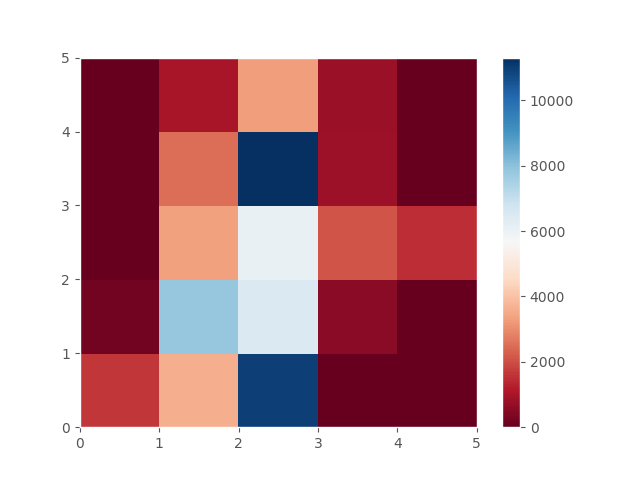

<Figure size 640x480 with 0 Axes>

In [51]:
#use the grouped results
plt.grid(False)
plt.pcolor(crossed_table, cmap='RdBu')
plt.colorbar()
plt.show()

<p>The heatmap plots the target variable (price) proportional to colour with respect to the variables 'DOGEBUSD_avg_price-binned' and 'BTCBUSD_avg_price-binned' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'BTCBUSD_avg_price-binned' and 'DOGEBUSD_avg_price-binned'.</p>

<p>The default labels convey no useful information to us. Let's change that:</p>


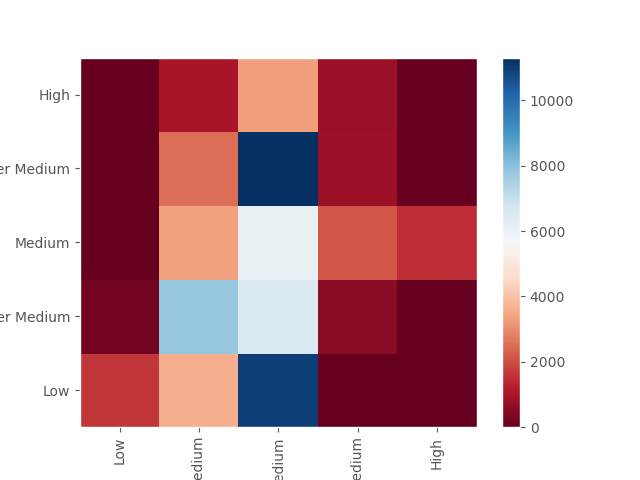

<Figure size 640x480 with 0 Axes>

In [52]:
fig, ax = plt.subplots()
plt.grid(False)
im = ax.pcolor(crossed_table, cmap='RdBu')

#label names
row_labels = crossed_table.columns
col_labels = crossed_table.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)
fig.colorbar(im)
plt.show()

<p>Visualization is very important in data science, and Python visualization packages provide great freedom. We will go more in-depth in a separate Python visualizations course.</p>

<p>The main question we want to answer in this module is, "What are the main characteristics that have the most impact on the BTC price?".</p>

<p>To get a better measure of the important characteristics, we look at the correlation of these variables with the BTC avg price. In other words: how is the BTC avg price dependent on this variable?</p>


<h2 id="correlation_causation">5. Correlation and Causation</h2>


<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>


<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


<p>Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>


In [53]:
df.corr()

,BTCBUSD_open,BTCBUSD_high,BTCBUSD_low,BTCBUSD_close,BTCBUSD_volume,BTCBUSD_rec_count,BTCBUSD_avg_price,APEBUSD_avg_price,ETHBUSD_avg_price,BNBBUSD_avg_price,XRPBUSD_avg_price,DOGEBUSD_avg_price,ADABUSD_avg_price,MATICBUSD_avg_price
BTCBUSD_open,1.000000,0.999753,0.999779,0.999675,-0.029440,-0.158690,0.999832,0.580734,0.880637,0.064367,0.295724,0.364792,0.057898,0.490789
BTCBUSD_high,0.999753,1.000000,0.999533,0.999798,-0.016125,-0.148802,0.999877,0.577558,0.881670,0.065226,0.295432,0.364788,0.061605,0.494498
BTCBUSD_low,0.999779,0.999533,1.000000,0.999801,-0.040935,-0.167978,0.999869,0.583646,0.879875,0.063828,0.296255,0.364970,0.054651,0.487606
BTCBUSD_close,0.999675,0.999798,0.999801,1.000000,-0.028612,-0.158669,0.999927,0.580788,0.880755,0.064428,0.295847,0.364880,0.057946,0.490914
BTCBUSD_volume,-0.029440,-0.016125,-0.040935,-0.028612,1.000000,0.505227,-0.028263,-0.068664,-0.008527,0.021322,-0.009886,0.003084,0.087996,0.063588
BTCBUSD_rec_count,-0.158690,-0.148802,-0.167978,-0.158669,0.505227,1.000000,-0.158305,-0.340785,-0.048611,0.144252,0.009183,0.008874,0.369915,0.251711
BTCBUSD_avg_price,0.999832,0.999877,0.999869,0.999927,-0.028263,-0.158305,1.000000,0.580604,0.880881,0.064559,0.295896,0.364919,0.058205,0.491169
APEBUSD_avg_price,0.580734,0.577558,0.583646,0.580788,-0.068664,-0.340785,0.580604,1.000000,0.525638,0.250646,0.413247,0.550292,-0.137763,0.122063
ETHBUSD_avg_price,0.880637,0.881670,0.879875,0.880755,-0.008527,-0.048611,0.880881,0.525638,1.000000,0.368134,0.468060,0.617403,0.346060,0.732224
BNBBUSD_avg_price,0.064367,0.065226,0.063828,0.064428,0.021322,0.144252,0.064559,0.250646,0.368134,1.000000,0.835815,0.817452,0.769498,0.618868


Sometimes we would like to know the significant of the correlation estimate.


<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


We can obtain this information using  "stats" module in the "scipy"  library.


In [54]:
from scipy import stats

<h3>BTCBUSD_avg_price vs. APEBUSD_avg_price</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'BTCBUSD_avg_price' and 'APEBUSD_avg_price'.


In [55]:
pearson_coef, p_value = stats.pearsonr(df['BTCBUSD_avg_price'], df['APEBUSD_avg_price'])
print("The Pearson Correlation Coefficient is",'%.3f' % pearson_coef, " with a P-value of P =",'%.3f' % p_value)  

The Pearson Correlation Coefficient is 0.581  with a P-value of P = 0.000


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between BTCBUSD_avg_price and APEBUSD_avg_price is statistically significant, although the linear relationship is quite strong (~0.5801).</p>


<h3>BTCBUSD_avg_price vs. ETHBUSD_avg_price</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'BTCBUSD_avg_price' and 'ETHBUSD_avg_price'.


In [56]:
pearson_coef, p_value = stats.pearsonr(df['BTCBUSD_avg_price'], df['ETHBUSD_avg_price'])
print("The Pearson Correlation Coefficient is",'%.3f' % pearson_coef, " with a P-value of P = ",'%.3f' % p_value)  

The Pearson Correlation Coefficient is 0.881  with a P-value of P =  0.000


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between BTCBUSD_avg_price and ETHBUSD_avg_price is statistically significant, and the linear relationship is very strong (~0.8809, close to 1).</p>


<h3>BTCBUSD_avg_price vs. BNBBUSD_avg_price</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'BTCBUSD_avg_price' and 'BNBBUSD_avg_price'.


In [57]:
pearson_coef, p_value = stats.pearsonr(df['BTCBUSD_avg_price'], df['BNBBUSD_avg_price'])
print("The Pearson Correlation Coefficient is",'%.3f' % pearson_coef, " with a P-value of P = ",'%.3f' % p_value)  

The Pearson Correlation Coefficient is 0.065  with a P-value of P =  0.000


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between BTCBUSD_avg_price and BNBBUSD_avg_price is statistically significant, and the linear relationship is moderately strong (~0.06456).</p>


<h3>BTCBUSD_avg_price vs. XRPBUSD_avg_price</h3>


Let's calculate the Pearson Correlation Coefficient and P-value of 'BTCBUSD_avg_price' and 'XRPBUSD_avg_price':


In [58]:
pearson_coef, p_value = stats.pearsonr(df['BTCBUSD_avg_price'], df['XRPBUSD_avg_price'])
print("The Pearson Correlation Coefficient is",'%.3f' % pearson_coef, " with a P-value of P =",'%.3f' % p_value ) 

The Pearson Correlation Coefficient is 0.296  with a P-value of P = 0.000


#### Conclusion:

Since the p-value is < 0.001, the correlation between XRPBUSD_avg_price and BTCBUSD_avg_price is statistically significant, and the linear relationship is quite strong (\~0.296).


### BTCBUSD_avg_price vs. DOGEBUSD_avg_price


Let's calculate the Pearson Correlation Coefficient and P-value of 'BTCBUSD_avg_price' and 'DOGEBUSD_avg_price':


In [59]:
pearson_coef, p_value = stats.pearsonr(df['BTCBUSD_avg_price'], df['DOGEBUSD_avg_price'])
print( "The Pearson Correlation Coefficient is",'%.3f' % pearson_coef, " with a P-value of P = ",'%.3f' % p_value)  

The Pearson Correlation Coefficient is 0.365  with a P-value of P =  0.000


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between DOGEBUSD_avg_price and BTCBUSD_avg_price is statistically significant, and the linear relationship is quite strong (~0.365).</p>


<h3>BTCBUSD_avg_price vs. ADABUSD_avg_price</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'BTCBUSD_avg_price' and 'ADABUSD_avg_price':


In [60]:
pearson_coef, p_value = stats.pearsonr(df['BTCBUSD_avg_price'], df['ADABUSD_avg_price'])
print("The Pearson Correlation Coefficient is",'%.3f' % pearson_coef, " with a P-value of P =",'%.3f' % p_value) 

The Pearson Correlation Coefficient is 0.058  with a P-value of P = 0.000


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between BTCBUSD_avg_price and ADABUSD_avg_price is statistically significant, and the linear relationship is very strong (~0.058).</p>


<h3>BTCBUSD_avg_price vs. MATICBUSD_avg_price</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'BTCBUSD_avg_price' and 'MATICBUSD_avg_price':


In [61]:
pearson_coef, p_value = stats.pearsonr(df['BTCBUSD_avg_price'], df['MATICBUSD_avg_price'])
print("The Pearson Correlation Coefficient is",'%.3f' % pearson_coef, " with a P-value of P =  ",'%.3f' % p_value ) 

The Pearson Correlation Coefficient is 0.491  with a P-value of P =   0.000


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between MATICBUSD_avg_price and BTCBUSD_avg_price is statistically significant, but the linear relationship is only moderate (~0.491).</p>


<h2 id="anova">6. ANOVA</h2>


<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>


<h3>BTCBUSD_avg_price-binned</h3>


<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>To see if different types of 'drive-wheels' impact  'price', we group the data.</p>


In [62]:
grouped_test2=df_gptest[[ 'BTCBUSD_avg_price-binned','BTCBUSD_avg_price']].groupby(['BTCBUSD_avg_price-binned'])
grouped_test2.head(2)

,BTCBUSD_avg_price-binned,BTCBUSD_avg_price
0,Lower Medium,16516.807793
1,Lower Medium,16473.844114
7,Medium,16639.429098
8,Medium,16760.047032
3530,Low,16051.882196
3534,Low,16044.689253
26377,Upper Medium,17208.172066
26378,Upper Medium,17207.728508
43417,High,17867.685931
43418,High,17878.003171


We can obtain the values of the method group using the method "get_group".


In [63]:
grouped_test2.get_group('Low')['BTCBUSD_avg_price']

3530     16051.882196
3534     16044.689253
3535     16042.459610
3536     16040.348439
3537     16002.093086
             ...     
23098    16016.138817
23099    15995.647572
23100    16023.482428
23101    16040.685140
23102    16046.275487
Name: BTCBUSD_avg_price, Length: 1853, dtype: float64

We can use the function 'f_oneway' in the module 'stats' to obtain the <b>F-test score</b> and <b>P-value</b>.


In [64]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Low')['BTCBUSD_avg_price'], 
                              grouped_test2.get_group('Lower Medium')['BTCBUSD_avg_price'],
                              grouped_test2.get_group('Medium')['BTCBUSD_avg_price'],
                              grouped_test2.get_group('Upper Medium')['BTCBUSD_avg_price'],
                              grouped_test2.get_group('High')['BTCBUSD_avg_price'])  
 
print( "ANOVA results: F=",'%.3f' % f_val, ", P =",'%.3f' % p_val)   

ANOVA results: F= 80855.263 , P = 0.000


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all five tested groups are all this highly correlated?

Let's examine them separately.


#### Low and Lower Medium

In [65]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Low')['BTCBUSD_avg_price'], 
                              grouped_test2.get_group('Lower Medium')['BTCBUSD_avg_price'])  
 
print( "ANOVA results: F=",'%.3f' % f_val, ", P =",'%.3f' % p_val )

ANOVA results: F= 28236.212 , P = 0.000


Let's examine the other groups.


#### Low and Medium


In [66]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Low')['BTCBUSD_avg_price'], 
                              grouped_test2.get_group('Medium')['BTCBUSD_avg_price'])  
   
print( "ANOVA results: F=",'%.3f' % f_val, ", P =",'%.3f' % p_val)   

ANOVA results: F= 84181.201 , P = 0.000


#### Low and Upper Medium


In [67]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Low')['BTCBUSD_avg_price'], 
                              grouped_test2.get_group('Upper Medium')['BTCBUSD_avg_price'])  
 
print("ANOVA results: F=",'%.3f' % f_val, ", P =",'%.3f' % p_val)   

ANOVA results: F= 102403.147 , P = 0.000


#### Low and High

In [68]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Low')['BTCBUSD_avg_price'], 
                              grouped_test2.get_group('High')['BTCBUSD_avg_price'])  
 
print("ANOVA results: F=",'%.3f' % f_val, ", P =",'%.3f' % p_val)   

ANOVA results: F= 217253.399 , P = 0.000


#### Lower Medium and Medium

In [69]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Lower Medium')['BTCBUSD_avg_price'], 
                              grouped_test2.get_group('Medium')['BTCBUSD_avg_price'])  
 
print("ANOVA results: F=",'%.3f' % f_val, ", P =",'%.3f' % p_val)   

ANOVA results: F= 96934.477 , P = 0.000


#### Lower Medium and Upper Medium

In [70]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Lower Medium')['BTCBUSD_avg_price'], 
                              grouped_test2.get_group('Upper Medium')['BTCBUSD_avg_price'])  
 
print("ANOVA results: F=",'%.3f' % f_val, ", P =",'%.3f' % p_val)   

ANOVA results: F= 130788.287 , P = 0.000


#### Lower Medium and High

In [71]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Lower Medium')['BTCBUSD_avg_price'], 
                              grouped_test2.get_group('High')['BTCBUSD_avg_price'])  
 
print("ANOVA results: F=",'%.3f' % f_val, ", P =",'%.3f' % p_val)   

ANOVA results: F= 124766.246 , P = 0.000


#### Medium and Upper Medium

In [72]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Medium')['BTCBUSD_avg_price'], 
                              grouped_test2.get_group('Upper Medium')['BTCBUSD_avg_price'])  
 
print("ANOVA results: F=",'%.3f' % f_val, ", P =",'%.3f' % p_val)   

ANOVA results: F= 51001.073 , P = 0.000


#### Medium and High

In [73]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Medium')['BTCBUSD_avg_price'], 
                              grouped_test2.get_group('High')['BTCBUSD_avg_price'])  
 
print("ANOVA results: F=",'%.3f' % f_val, ", P =",'%.3f' % p_val)   

ANOVA results: F= 63941.634 , P = 0.000


#### Upper Medium and High

In [74]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Upper Medium')['BTCBUSD_avg_price'], 
                              grouped_test2.get_group('High')['BTCBUSD_avg_price'])  
 
print("ANOVA results: F=",'%.3f' % f_val, ", P =",'%.3f' % p_val)   

ANOVA results: F= 6263.723 , P = 0.000


<h2 id="durbin">7. Durbin-Watson Test</h2>

<h4>What is Durbin-Watson Test?</h4>


In regression analysis, Durbin-Watson (DW) is useful for checking the first-order autocorrelation (serial correlation). It analyzes the residuals for independence over time points (autocorrelation). The autocorrelation varies from -1 (negative autocorrelation) to 1 (positive autocorrelation).

<p><p>Durbin-Watson test analyzes the following hypotheses, </p></p><p><p>Null hypothesis (H<sub>0</sub>): Residuals from the regression are not autocorrelated (autocorrelation coefficient, ρ = 0)\nAlternative hypothesis (H<sub>a</sub>): Residuals from the regression are autocorrelated (autocorrelation coefficient, ρ > 0)</p></p>
We will use <b>durbin_watson</b> for Durbin-Watson Test and <b>OLS</b> to get residuals from "statsmodels" library

In [75]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson as dwtest

X = df["ETHBUSD_avg_price"] # independent
y = df["BTCBUSD_avg_price"] # dependent
# to get intercept
X = sm.add_constant(X)
# fit the regression model
reg = sm.OLS(y, X).fit()

In [76]:
print('%.5f' % dwtest(resids=np.array(reg.resid)))

0.00073


Let's calculate Durbin-Watson for all available pairs

In [77]:
import itertools

cols = ["APEBUSD_dep","BTCBUSD_dep","ETHBUSD_dep","BNBBUSD_dep","XRPBUSD_dep",
         "DOGEBUSD_dep","ADABUSD_dep","MATICBUSD_dep"]
idxs = ["APEBUSD_indep","BTCBUSD_indep","ETHBUSD_indep","BNBBUSD_indep","XRPBUSD_indep",
         "DOGEBUSD_indep","ADABUSD_indep","MATICBUSD_indep"]

durbin = pd.DataFrame(columns=cols, index=idxs)

for (file1, file2) in itertools.permutations(files, 2):
    curr1 = file1.split("_")[0]
    curr2 = file2.split("_")[0]
    X = df[f"{curr1}_avg_price"] # independent
    y = df[f"{curr2}_avg_price"] # dependent
    # to get intercept
    X = sm.add_constant(X)
    # fit the regression model
    reg = sm.OLS(y, X).fit()
    dw = dwtest(resids=np.array(reg.resid))
    durbin.loc[f"{curr1}_indep", f"{curr2}_dep"] = dw
    
np.fill_diagonal(durbin.values, "—")
pd.options.display.float_format = '{:.5f}'.format 
durbin

,APEBUSD_dep,BTCBUSD_dep,ETHBUSD_dep,BNBBUSD_dep,XRPBUSD_dep,DOGEBUSD_dep,ADABUSD_dep,MATICBUSD_dep
APEBUSD_indep,—,0.00065,0.00043,0.00010,0.00032,0.00015,0.00009,0.00025
BTCBUSD_indep,0.00026,—,0.00059,0.00009,0.00024,0.00010,0.00006,0.00017
ETHBUSD_indep,0.00018,0.00073,—,0.00008,0.00027,0.00017,0.00005,0.00028
BNBBUSD_indep,0.00013,0.00051,0.00036,—,0.00080,0.00030,0.00014,0.00030
XRPBUSD_indep,0.00015,0.00046,0.00035,0.00060,—,0.00047,0.00016,0.00028
DOGEBUSD_indep,0.00016,0.00050,0.00043,0.00028,0.00065,—,0.00009,0.00033
ADABUSD_indep,0.00015,0.00051,0.00036,0.00018,0.00040,0.00014,—,0.00051
MATICBUSD_indep,0.00012,0.00043,0.00041,0.00014,0.00032,0.00019,0.00032,—


Now we can see a dataframe that consists of all the p-values. <p><h4>How to interpret these values?</h4></p> We take any value, its column will be responsible for the dependent value, and the row - for the independent value

<h2 id="granger">8. Granger Causality Test</h2>

<b>What is Granger causality test?</b>
<p>The Granger causality test is a statistical hypothesis test for determining whether one time series is a factor and offer useful information in forecasting another time series.</p>

<p>For example, given a question: Could we use today’s Apple’s stock price to predict tomorrow’s Tesla’s stock price? If this is true, our statement will be Apple’s stock price Granger causes Tesla’s stock price. If this is not true, we say Apple’s stock price does not Granger cause Tesla’s stock price.</p>

In [78]:
from statsmodels.tsa.stattools import grangercausalitytests

def GCT(coin_name):
    test_df = df[["BTCBUSD_avg_price", f"{coin_name}_avg_price"]]
    x = df.index
    y1 = test_df["BTCBUSD_avg_price"]
    y2 = test_df[f"{coin_name}_avg_price"]
    
    fig, ax1 = plt.subplots(1, 1, figsize = (16,9), dpi = 80)
    ax1.plot(x, y1, color = 'tab:red')
    
    ax2 = ax1.twinx()
    ax2.plot(x, y2, color = 'tab:blue')
    
    # decor for ax1
    ax1.set_xlabel("ts", fontsize = 20)
    ax1.tick_params(axis = 'x', rotation = 0, labelsize = 12)
    ax1.set_ylabel("BTCBUST_avg_price", color = 'tab:red', fontsize = 20)
    ax1.tick_params(axis = 'y', rotation = 0, labelcolor = 'tab:red')
    ax1.grid(alpha=.4)
    
    #decor for ax2
    ax2.set_ylabel(f"{coin_name}_avg_price", color = 'tab:blue', fontsize = 20)
    ax2.tick_params(axis = 'y', rotation = 0, labelcolor = 'tab:blue')
    ax2.set_xticks(np.arange(0, len(x), 60))
    ax2.set_xticklabels(x[::60], rotation = 90, fontdict = {'fontsize':10})
    ax2.set_title("Visualizing Leading Indicator Phenomenon", fontsize = 22)
    
    fig.tight_layout()
    plt.show()

Call our function:

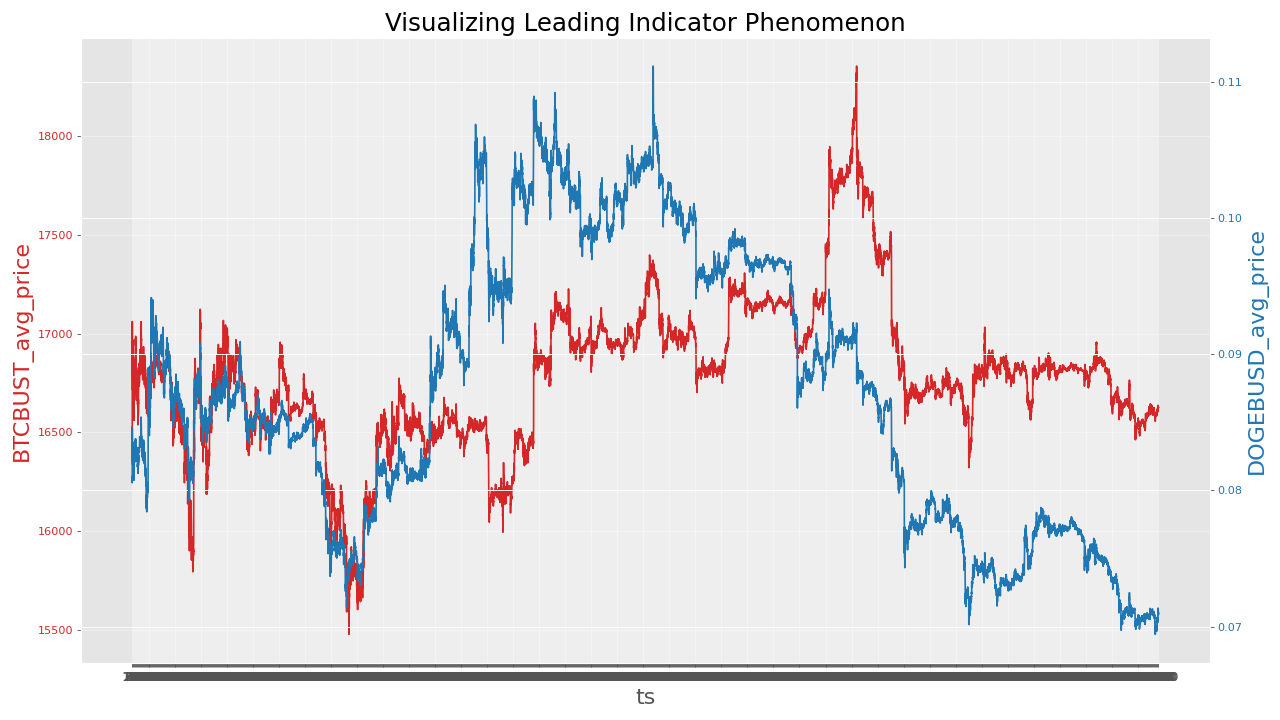

<Figure size 1280x720 with 0 Axes>

In [79]:
GCT("DOGEBUSD")

Now let's define custom function which will do Granger Causality Test and return result as <b>pd.DataFrame</b>:

In [80]:
def grangers_causation_matrix(data, maxlag, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [81]:
pd.options.display.float_format = '{:.2f}'.format
grangers_causation_matrix(df[["BTCBUSD_avg_price", "DOGEBUSD_avg_price"]], 1, variables=["BTCBUSD_avg_price", "DOGEBUSD_avg_price"])

,BTCBUSD_avg_price_x,DOGEBUSD_avg_price_x
BTCBUSD_avg_price_y,1.00,0.20
DOGEBUSD_avg_price_y,0.00,1.00


How to interpret the p-values?

Assuming a significance level of 0.05, if the p-value is lesser than 0.05, then we do NOT reject the null hypothesis that X does NOT granger cause Y.

So, in the above table, the p-value for BTCBUSD_avg_price_x and DOGEBUSD_avg_price_y is 0.00. So we reject the null hypothesis and conclude that (BTCBUSD_avg_price) granger causes (DOGEBUSD_avg_price).

That means, BTCBUSD_avg_price will likely be helpful in predicting the DOGEBUSD_avg_price.

But the p-value for DOGEBUSD_avg_price_x and BTCBUSD_avg_price_y is 0.20.

Since the p-value isn't less than 0.05, we can't reject the null hypothesis. That is, "DOGEBUSD_avg_price_x" is predictive of "BTCBUSD_avg_price_y".

Let's calculate Granger Causality Test for all available pairs

In [82]:
grangers_causation_matrix(df[["BTCBUSD_avg_price", "APEBUSD_avg_price"]], 1, variables=["BTCBUSD_avg_price", "APEBUSD_avg_price"])

,BTCBUSD_avg_price_x,APEBUSD_avg_price_x
BTCBUSD_avg_price_y,1.00,0.06
APEBUSD_avg_price_y,0.05,1.00


In [83]:
grangers_causation_matrix(df[["BTCBUSD_avg_price", "ETHBUSD_avg_price"]], 1, variables=["BTCBUSD_avg_price", "ETHBUSD_avg_price"])

,BTCBUSD_avg_price_x,ETHBUSD_avg_price_x
BTCBUSD_avg_price_y,1.00,0.01
ETHBUSD_avg_price_y,0.03,1.00


In [84]:
grangers_causation_matrix(df[["BTCBUSD_avg_price", "BNBBUSD_avg_price"]], 1, variables=["BTCBUSD_avg_price", "BNBBUSD_avg_price"])

,BTCBUSD_avg_price_x,BNBBUSD_avg_price_x
BTCBUSD_avg_price_y,1.00,0.87
BNBBUSD_avg_price_y,0.00,1.00


In [85]:
grangers_causation_matrix(df[["BTCBUSD_avg_price", "XRPBUSD_avg_price"]], 1, variables=["BTCBUSD_avg_price", "XRPBUSD_avg_price"])

,BTCBUSD_avg_price_x,XRPBUSD_avg_price_x
BTCBUSD_avg_price_y,1.00,0.39
XRPBUSD_avg_price_y,0.01,1.00


In [86]:
grangers_causation_matrix(df[["BTCBUSD_avg_price", "ADABUSD_avg_price"]], 1, variables=["BTCBUSD_avg_price", "ADABUSD_avg_price"])

,BTCBUSD_avg_price_x,ADABUSD_avg_price_x
BTCBUSD_avg_price_y,1.00,0.92
ADABUSD_avg_price_y,0.02,1.00


In [87]:
grangers_causation_matrix(df[["BTCBUSD_avg_price", "MATICBUSD_avg_price"]], 1, variables=["BTCBUSD_avg_price", "MATICBUSD_avg_price"])

,BTCBUSD_avg_price_x,MATICBUSD_avg_price_x
BTCBUSD_avg_price_y,1.00,0.23
MATICBUSD_avg_price_y,0.03,1.00


<h3>Conclusion:</h3>


<p>We now have a better idea of what our data looks like and which variables are more related to our main currency - the BTC:</p>

<ul>
    <li>ETH</li>
    <li>MATIC</li>
    <li>APE</li>
    <li>DOGE</li>
</ul>
<p> Also we can say after <b>Granger Causality Test</b> that the BTC affects on:</p>
<ul>
    <li>ETH</li>
    <li>MATIC</li>
    <li>APE</li>
    <li>DOGE</li>
    <li>ADA</li>
    <li>XRP</li>
    <li>BNB</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Fiorella Wenver</a>

<a href="https:// https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>

<a href="https://www.linkedin.com/in/bohdan-tsisinskyi-539913255/ " target="_blank" >Bohdan Tsisinskyi</a>.

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2023-02-03        | 3.0     | Bohdan     | cahnged all lab                    |
| 2020-10-30        | 2.1     | Lakshmi    | changed URL of csv                 |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2023. All rights reserved. <h3/>
